In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('dataset/train.csv')
df.head()

df.drop(columns=['Id'],axis=1,inplace=True)

In [2]:
#What's missing?
#Here NA is although defined as NaN by pandas does not mean missing data for us
#It just means that the particular amenity is not available.
#So for categorical data, we are going to replace NaN with NA

categorical_columns = df.select_dtypes(include=['object', 'category']).columns

df[categorical_columns] = df[categorical_columns].fillna('N/A')


missing_values = df.isna().sum()
columns_with_missing_values = missing_values[missing_values > 0]
missing_info = pd.DataFrame({
    'Missing Values': columns_with_missing_values,
    'Data Type': df[columns_with_missing_values.index].dtypes,
    'Percentage Missing': df[columns_with_missing_values.index].isna().mean()*100
})

print(missing_info)

             Missing Values Data Type  Percentage Missing
LotFrontage             259   float64           17.739726
MasVnrArea                8   float64            0.547945
GarageYrBlt              81   float64            5.547945


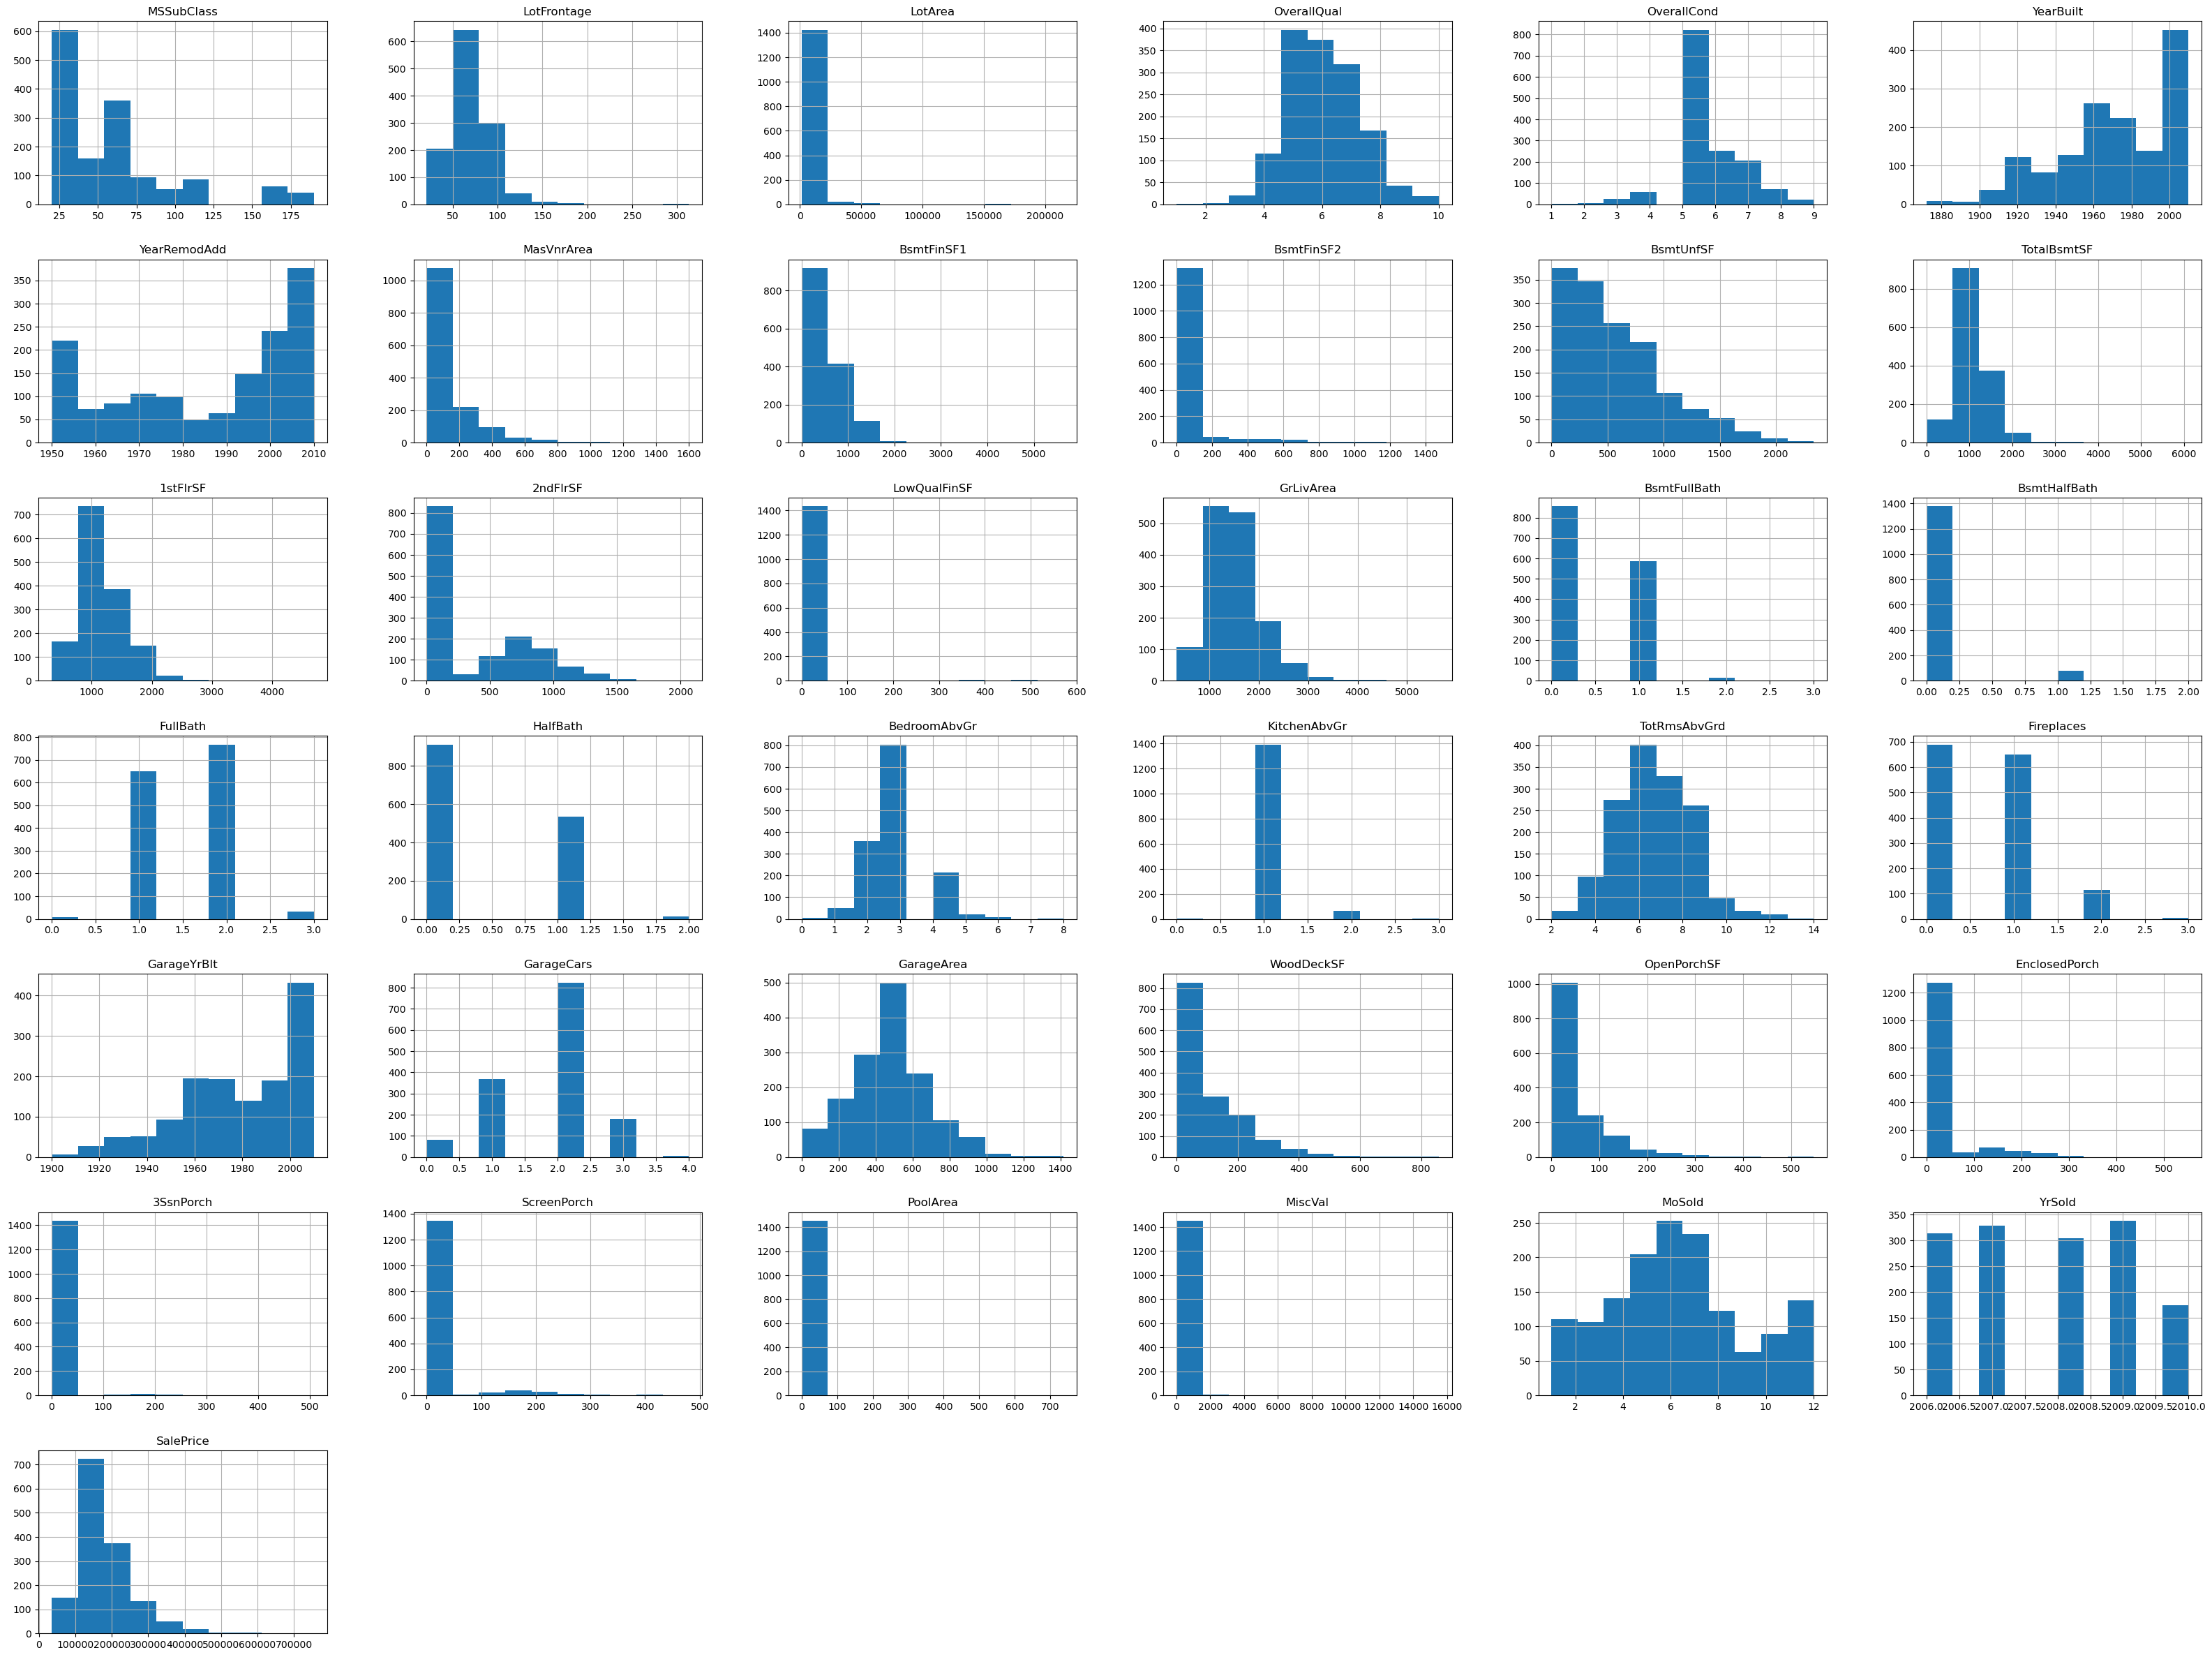

In [3]:
#See distribution of numerical columns
from matplotlib import pyplot as plt

numerical_columns = []
for col in df.columns:
    if df[col].dtype in ['float64','int']:
        numerical_columns.append(col)

numerical_df = df[numerical_columns]

numerical_df.hist(figsize=[40,30])

plt.show()

In [4]:
#Fix missing data for numerical columns with median
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

In [5]:
#For categorical data, find columns where ordinal encoding can be used

ordinal_cat_1 = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'N/A': 0}
ordinal_cat_2 = {
    'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'N/A': 0
}
ordinal_cat_3 = {'Fin': 3, 'RFn': 2, 'Unf': 1, 'N/A': 0}
ordinal_cat_4 = {'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0}
ordinal_cat_5 = {'AllPub': 3, 'NoSewr': 2, 'NoSeWa': 1, 'ELO': 0}


# Additional mappings
ordinal_cat_6 = ordinal_cat_1  # For ExterQual, BsmtQual, HeatingQC, KitchenQual, FireplaceQu, GarageQual, GarageCond, PoolQC

ordinal_cat_7 = {
    'Grvl': 2,  # Gravel
    'Pave': 1,  # Paved
    'NA': 0     # No alley access
}

not_ordinal_cat_columns = []

# Apply mappings
for col in categorical_columns:
    if df[col].isin(['Ex', 'Gd', 'TA', 'Fa', 'Po']).any():
        df[col] = df[col].map(ordinal_cat_1)
    elif df[col].isin(['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf']).any():
        df[col] = df[col].map(ordinal_cat_2)
    elif df[col].isin(['Fin', 'RFn', 'Unf']).any():
        df[col] = df[col].map(ordinal_cat_3)
    elif df[col].isin(['Reg', 'IR1', 'IR2', 'IR3']).any():
        df[col] = df[col].map(ordinal_cat_4)
    elif df[col].isin(['AllPub', 'NoSewr', 'NoSeWa', 'ELO']).any():
        df[col] = df[col].map(ordinal_cat_5)
    # Additional categories
    elif df[col].isin(['Ex', 'Gd', 'TA', 'Fa', 'Po']).any():
        df[col] = df[col].map(ordinal_cat_6)
    elif df[col].isin(['Grvl','Pave']).any():
        df[col] = df[col].map(ordinal_cat_7)
    else:
        not_ordinal_cat_columns.append(col)

ordinal_cat_columns = list(set(categorical_columns) - set(not_ordinal_cat_columns))

df[ordinal_cat_columns] = df[ordinal_cat_columns].fillna(0)


print('Orderinal category Columns:',ordinal_cat_columns)
print('Non ordinal category columns:', not_ordinal_cat_columns)


Orderinal category Columns: ['Utilities', 'ExterCond', 'LotShape', 'ExterQual', 'BsmtFinType2', 'BsmtCond', 'KitchenQual', 'FireplaceQu', 'BsmtQual', 'HeatingQC', 'GarageQual', 'Alley', 'BsmtFinType1', 'GarageFinish', 'GarageCond', 'BsmtExposure', 'Street', 'PoolQC']
Non ordinal category columns: ['MSZoning', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [6]:
#Encode MS Subclass
def custom_encode_mssubclass(val):
    if val in [20, 30, 120]:
        return '1-Story'
    elif val in [45, 50, 150]:
        return '1-1/2 Story'
    elif val in [60, 70, 160]:
        return '2-Story'
    elif val == 75:
        return '2-1/2 Story'
    elif val in [80, 85, 180]:
        return 'Split/Multi-Level'
    elif val in [90, 190]:
        return 'Duplex/2 Family'
    else:
        return 'Other'
    
df['MSSubClass'] = df['MSSubClass'].apply(custom_encode_mssubclass)

not_ordinal_cat_columns.append('MSSubClass')

nominal_cat_columns = not_ordinal_cat_columns

In [7]:
#One Hot encode
df = pd.get_dummies(df,columns=not_ordinal_cat_columns,drop_first=True)

In [8]:
#X and y

X = df.drop(['SalePrice'],axis=1)
y = df['SalePrice']

print(X.isna().sum().sort_values(ascending=False))

LotFrontage                     0
Exterior2nd_MetalSd             0
Exterior1st_Stucco              0
Exterior1st_VinylSd             0
Exterior1st_Wd Sdng             0
                               ..
Neighborhood_Mitchel            0
Neighborhood_NAmes              0
Neighborhood_NPkVill            0
Neighborhood_NWAmes             0
MSSubClass_Split/Multi-Level    0
Length: 217, dtype: int64


In [9]:
#Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

# Standardizing the features (important for regularization)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
from sklearn.linear_model import LassoCV

# LASSO with cross-validation to find the best alpha
lasso_cv = LassoCV(alphas=np.logspace(-4, 4, 20), cv=5, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)

# Best alpha value
best_alpha = lasso_cv.alpha_
print("Best alpha:", best_alpha)

# Extracting features and coefficients
feature_names = X.columns
coefficients = lasso_cv.coef_

# Creating a DataFrame of features and their coefficients
lasso_coefficients = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Features with non-zero coefficients are selected by LASSO
selected_features = lasso_coefficients[lasso_coefficients['Coefficient'] != 0]
print("Selected_features",selected_features)

/Users/tejas/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17202665037.980713, tolerance: 572016182.2224231
  model = cd_fast.enet_coordinate_descent_gram(
/Users/tejas/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84275257376.19882, tolerance: 572016182.2224231
  model = cd_fast.enet_coordinate_descent_gram(
/Users/tejas/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 112260897381.45956, tolerance: 572016182.2224231
  model = cd_fast.enet_coordinate_descent_gram(
/Users/tejas/anaconda3/lib/python3.11/site-packages/sklearn/linea

Best alpha: 206.913808111479
Selected_features                         Feature   Coefficient
6                   OverallQual  97265.502099
7                   OverallCond  15023.544634
9                  YearRemodAdd   4379.099980
10                   MasVnrArea   6620.203777
11                    ExterQual  21943.198428
..                          ...           ...
186           GarageType_Detchd   -601.791047
203                SaleType_New      6.920291
210       SaleCondition_Partial  15013.042720
211          MSSubClass_1-Story     84.943273
214  MSSubClass_Duplex/2 Family  -7701.893802

[62 rows x 2 columns]


In [32]:
feature_names = selected_features['Feature'].tolist()

selected_feature_indices = [list(X.columns).index(feature) for feature in feature_names]

X_train_selected = X_train_scaled.iloc[:, selected_feature_indices]
X_test_selected = X_test_scaled.iloc[:, selected_feature_indices]

y_train_selected = y_train
y_test_selected = y_test

In [33]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


param_grid = {
    'alpha': np.logspace(-4, 4, 20),
    'l1_ratio': np.linspace(0, 1, 20)
}

elastic_net = ElasticNet(random_state=42)
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train_selected, y_train_selected)

best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test_selected)

# Calculate the mean squared error
mse = mean_squared_error(y_test_selected, y_pred)
print("Mean Squared Error:", mse)

/Users/tejas/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.299e+11, tolerance: 5.374e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/tejas/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.482e+11, tolerance: 5.720e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemente

Mean Squared Error: 1137776469.698427


In [35]:
#Pickle and Joblib the model
import pickle
from joblib import dump, load

with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

# Save the model
dump(best_model, 'model.joblib')


['model.joblib']

In [36]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(r2)

0.8516651783815496


In [ ]:
  s